# Croatia: Population Trend 1995 - 2014
 
* [Presentation (slide-deck)](https://github.com/zunicd/Population-Trend-Croatia/blob/master/Croatia%20-%20Population%20Trend%201995%20-%202014.pdf)


**Data Source:** https://www.kaggle.com/worldbank/world-development-indicators

**Folder:** 'world-development-indicators' 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
%matplotlib inline

# Tick locating and formatting
# we will use it to have integer-only tick labels
from matplotlib.ticker import MaxNLocator

In [2]:
# read the file
data = pd.read_csv('./Data/world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [3]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [4]:
# Check the number of unique indicators 
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [5]:
# Check the number of countries
countries = data['CountryName'].unique().tolist()
len(countries)

247

**Ex-Yugoslavia countries**

In [6]:
yugo_cntr = pd.Series(['Croatia','Slovenia','Serbia','Montenegro','Macedonia, FYR','Bosnia and Herzegovina','Kosovo'])
yugo_cntr

0                   Croatia
1                  Slovenia
2                    Serbia
3                Montenegro
4            Macedonia, FYR
5    Bosnia and Herzegovina
6                    Kosovo
dtype: object

In [7]:
masky = data['CountryName'].isin(yugo_cntr)

In [8]:
yugo = data[masky]
yugo.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5479,Bosnia and Herzegovina,BIH,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,42.748000
5480,Bosnia and Herzegovina,BIH,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,70.154967



**Work with "Population, total"**

The same time frame for all countires is 1995 - 2014

In [9]:
maskp = data['IndicatorName'].str.contains('Population, total')
pop_yugo = data[masky & maskp]
pop_yugo = pop_yugo[pop_yugo['Year'] > 1994]
pop_yugo.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2514736,Bosnia and Herzegovina,BIH,"Population, total",SP.POP.TOTL,1995,3879278.0
2528882,Croatia,HRV,"Population, total",SP.POP.TOTL,1995,4669000.0


## Display population trend (growth/decline) for all countries##
 
 

**Transform the dataframe**

In [10]:
pop_y = pop_yugo.pivot_table(values='Value',columns=('CountryName','CountryCode'),index='Year')
pop_y.head(2)

CountryName,Bosnia and Herzegovina,Croatia,Kosovo,"Macedonia, FYR",Montenegro,Serbia,Slovenia
CountryCode,BIH,HRV,KSV,MKD,MNE,SRB,SVN
Year,,,,,,,
1995,3879278.0,4669000.0,2029000.0,1953544.0,608388.0,7625357.0,1989872.0
1996,3810649.0,4494000.0,2059000.0,1958303.0,607502.0,7617794.0,1988628.0


In [11]:
pop_y.index.name = None
pop_y.head(2)

CountryName,Bosnia and Herzegovina,Croatia,Kosovo,"Macedonia, FYR",Montenegro,Serbia,Slovenia
CountryCode,BIH,HRV,KSV,MKD,MNE,SRB,SVN
1995,3879278.0,4669000.0,2029000.0,1953544.0,608388.0,7625357.0,1989872.0
1996,3810649.0,4494000.0,2059000.0,1958303.0,607502.0,7617794.0,1988628.0


In [12]:
pop_yt = pop_y.transpose()
pop_yt.head(2)

,,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
CountryName,CountryCode,,,,,,,,,,,,,,,,,,,,
Bosnia and Herzegovina,BIH,3879278.0,3810649.0,3779354.0,3775898.0,3784389.0,3792878.0,3799747.0,3808347.0,3817313.0,3825872.0,3833377.0,3838504.0,3840418.0,3839749.0,3837732.0,3835258.0,3832310.0,3828419.0,3823533.0,3817554.0
Croatia,HRV,4669000.0,4494000.0,4572000.0,4501000.0,4554000.0,4426000.0,4440000.0,4440000.0,4440000.0,4439000.0,4442000.0,4440000.0,4436000.0,4434508.0,4429078.0,4417781.0,4280622.0,4267558.0,4255689.0,4238389.0


**Calculate population growth/decline for the time frame 1995 - 2014**




Formula:


$\displaystyle PR = \frac{(V_{Present} - V_{Past})}{V_{Past}} * 100$    

where

$PR$ = Percent Rate; $V_{Present}$ = Present Value; $V_{Past}$ = Past Value



In [13]:
pop_yt['Population growth'] = ((pop_yt[2014] - pop_yt[1995]) / pop_yt[1995]) * 100
pop_yt.head(2)

,,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Population growth
CountryName,CountryCode,,,,,,,,,,,,,,,,,,,,,
Bosnia and Herzegovina,BIH,3879278.0,3810649.0,3779354.0,3775898.0,3784389.0,3792878.0,3799747.0,3808347.0,3817313.0,3825872.0,...,3838504.0,3840418.0,3839749.0,3837732.0,3835258.0,3832310.0,3828419.0,3823533.0,3817554.0,-1.591121
Croatia,HRV,4669000.0,4494000.0,4572000.0,4501000.0,4554000.0,4426000.0,4440000.0,4440000.0,4440000.0,4439000.0,...,4440000.0,4436000.0,4434508.0,4429078.0,4417781.0,4280622.0,4267558.0,4255689.0,4238389.0,-9.222767


In [14]:
pop_yt.reset_index(inplace=True)
pop_yt.head(2)

,CountryName,CountryCode,1995,1996,1997,1998,1999,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Population growth
0,Bosnia and Herzegovina,BIH,3879278.0,3810649.0,3779354.0,3775898.0,3784389.0,3792878.0,3799747.0,3808347.0,...,3838504.0,3840418.0,3839749.0,3837732.0,3835258.0,3832310.0,3828419.0,3823533.0,3817554.0,-1.591121
1,Croatia,HRV,4669000.0,4494000.0,4572000.0,4501000.0,4554000.0,4426000.0,4440000.0,4440000.0,...,4440000.0,4436000.0,4434508.0,4429078.0,4417781.0,4280622.0,4267558.0,4255689.0,4238389.0,-9.222767


### Setup data for plotting. 

Create the data frame with just country codes and population growth values.


In [15]:
plot_data = pop_yt[['CountryCode','Population growth']]
plot_data

,CountryCode,Population growth
0,BIH,-1.591121
1,HRV,-9.222767
2,KSV,-10.145441
3,MKD,6.249207
4,MNE,2.204514
5,SRB,-6.503682
6,SVN,3.635711


**Country coordinates for plotting**

In [16]:
country_geo = './Data/yugo-countries.json'

**Setup folium and choropleth maps**

In [17]:
# create a plain map of ex-Yugoslavia
yugo_map = folium.Map(
    location=[43.84864, 18.35644],
    tiles='openstreetmap',
    zoom_start=7
)

# generate choropleth map using the population growth of each country from 1995 to 2014
folium.Choropleth(
    geo_data=country_geo,
    data=plot_data,
    columns=['CountryCode','Population growth'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name='Population Growth (%)'
).add_to(yugo_map)

folium.LayerControl().add_to(yugo_map)


In [18]:
# Create Folium plot
yugo_map.save('./Figures/yugo_pop_growth.html')

Negative population growth values mean population decline.

In the next steps we will reserach data for Croatia (9.2 % population decline since 1995).

In [19]:
# Import the Folium interactive html file
from IPython.display import IFrame
IFrame(src='./Figures/yugo_pop_growth.html', width='900', height='800')

## Display "Net Migration" for Croatia



Data frame for all countries is available from 1962 - 2012 in 5 years steps. No data for Kososvo, and some data misisng for Serbia.

In [20]:
maskm = data['IndicatorName'].str.contains('Net migration')
migr_yugo = data[masky & maskm]
migr_yugo.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
56575,Bosnia and Herzegovina,BIH,Net migration,SM.POP.NETM,1962,-50002.0
59850,Croatia,HRV,Net migration,SM.POP.NETM,1962,1854.0
67328,"Macedonia, FYR",MKD,Net migration,SM.POP.NETM,1962,-40940.0
68817,Montenegro,MNE,Net migration,SM.POP.NETM,1962,-2001.0
73296,Slovenia,SVN,Net migration,SM.POP.NETM,1962,-22059.0


**Transform the dataframe**

In [21]:
df_yugo = migr_yugo.drop(['CountryCode','IndicatorCode','IndicatorName'],axis=1)
df_yugo.rename(columns={'CountryName':'Country'}, inplace=True)
df_yugo.head()

,Country,Year,Value
56575,Bosnia and Herzegovina,1962,-50002.0
59850,Croatia,1962,1854.0
67328,"Macedonia, FYR",1962,-40940.0
68817,Montenegro,1962,-2001.0
73296,Slovenia,1962,-22059.0


In [22]:
migr_y = df_yugo.pivot_table(values='Value',columns='Country',index='Year')
migr_y.head()

Country,Bosnia and Herzegovina,Croatia,"Macedonia, FYR",Montenegro,Serbia,Slovenia
Year,,,,,,
1962,-50002.0,1854.0,-40940.0,-2001.0,NaN,-22059.0
1967,-99999.0,-1225.0,-28981.0,-53773.0,NaN,-14950.0
1972,-74999.0,-18403.0,-61002.0,-2001.0,NaN,17942.0
1977,-74999.0,18681.0,-14749.0,-7401.0,NaN,34686.0
1982,-29999.0,54369.0,-72752.0,-2001.0,NaN,68363.0


**Plot net migration for all ex-Yugoslavia countries**

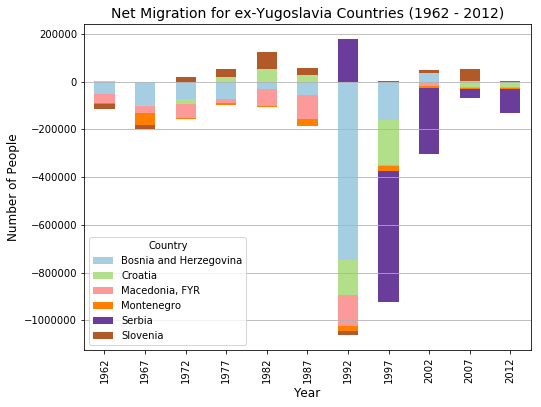

In [23]:
ax = migr_y.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Paired')

ax.set_title ('Net Migration for ex-Yugoslavia Countries (1962 - 2012)',fontsize=14)
ax.set_ylabel('Number of People',fontsize=12)
ax.set_xlabel('Year',fontsize=12)
ax.yaxis.grid(True)


* During the war the highest emigration was from Bosnia and Herzegovina. Much less form Croatia and Macedonia.

* During the same period we see high immigration to Serbia.

* After the war the highest emigration was from Serbia. People were still emigrating from Croatia and Bosnia and Herzegovina.

Let's now concentrate on Croatia only.

**Plot Net Migration for Croatia**

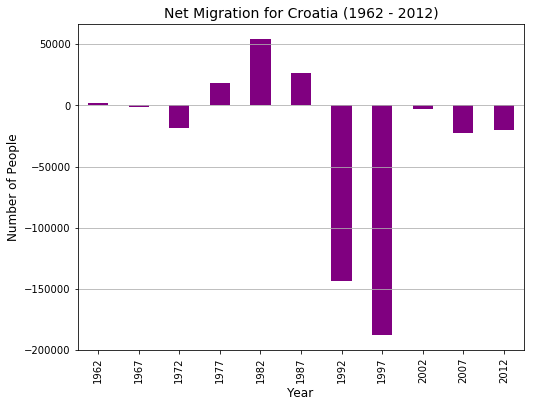

In [24]:
fig = plt.figure() # create figure

ax = migr_y['Croatia'].plot(kind='bar', figsize=(8, 6),color='purple')

ax.set_title ('Net Migration for Croatia (1962 - 2012)',fontsize=14)
ax.set_ylabel('Number of People',fontsize=12)
ax.set_xlabel('Year',fontsize=12)
ax.yaxis.grid(True)

# fig.savefig("migration_bars.png")

Negative values are **emigration** and positive values are **immigration**. Emigration was high at 90's, during and after the Yugoslav wars. There was a smaller, but still significant, increase in emigration after the Great Recession (2008).


## Display GDP and population growth for Croatia (1995 - 2014)


### Prepare GDP dataframes for Croatia

In [25]:
gdpi = 'GDP per capita \(constant 2005'
maskg = data['IndicatorName'].str.contains(gdpi)
gdp_cro = data[maskg & data['CountryName'].isin(['Croatia'])]
gdp_cro = gdp_cro[gdp_cro['Year'] > 1994]
gdp_cro.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2528582,Croatia,HRV,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1995,6603.965627
2663607,Croatia,HRV,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1996,7264.131435


In [26]:
# transform dataframe 
gdp_c = gdp_cro.set_index(['Year']).drop(['IndicatorCode','IndicatorName','CountryCode','CountryName'],axis=1)
# rename 'Value' column
gdp_c.columns = ['gdp']
gdp_c.head(2)

,gdp
Year,
1995,6603.965627
1996,7264.131435


### Prepare "Population, total" dataframes for Croatia

In [27]:
# maskp = data['IndicatorName'].str.contains('Population, total')
pop_cro = data[maskp & data['CountryName'].isin(['Croatia'])]
pop_cro = pop_cro[pop_cro['Year'] > 1994]
pop_cro.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2528882,Croatia,HRV,"Population, total",SP.POP.TOTL,1995,4669000.0
2663918,Croatia,HRV,"Population, total",SP.POP.TOTL,1996,4494000.0


In [28]:
# transform dataframe 
pop_c = pop_cro.set_index(['Year']).drop(['IndicatorCode','IndicatorName','CountryCode','CountryName'],axis=1)
# rename 'Value' column
pop_c.columns = ['population_total']
pop_c.head(2)

,population_total
Year,
1995,4669000.0
1996,4494000.0


### Plot "Population, total" for Croatia (1995 - 2014)

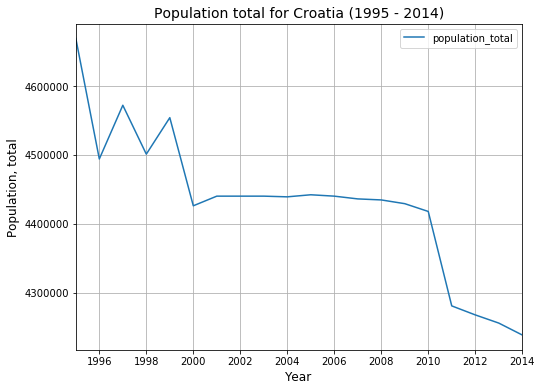

In [29]:
# plt.figure() # create figure

ax = pop_c.plot(kind='line', figsize=(8, 6))

ax.set_title ('Population total for Croatia (1995 - 2014)',fontsize=14)
ax.set_ylabel(pop_cro['IndicatorName'].iloc[0],fontsize=12)
ax.set_xlabel('Year',fontsize=12)
ax.grid(True)

# makes the x-axis have integer-only tick labels
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# plt.savefig("population_line.png")

### Plot GDP per Capita for Croatia (1995 - 2014)

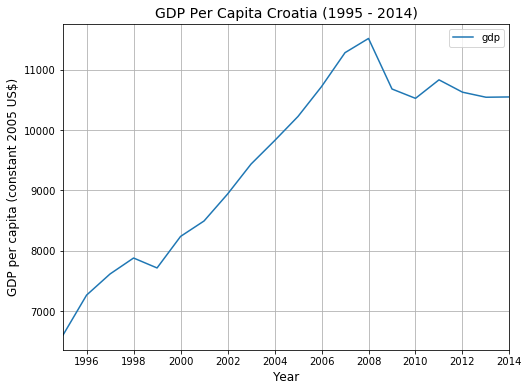

In [30]:
# plt.figure() # create figure

ax = gdp_c.plot(kind='line', figsize=(8, 6))

ax.set_title ('GDP Per Capita Croatia (1995 - 2014)',fontsize=14)
ax.set_ylabel(gdp_cro['IndicatorName'].iloc[0],fontsize=12)
ax.set_xlabel('Year',fontsize=12)
ax.grid(True)

# makes the x-axis have integer-only tick labels
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# fig = plt.gcf()

# plt.savefig("GDP_line.png")

### Plot "Population, total" and GDP per Capita for Croatia (1995 - 2014)

**Let's put those two plots together:**

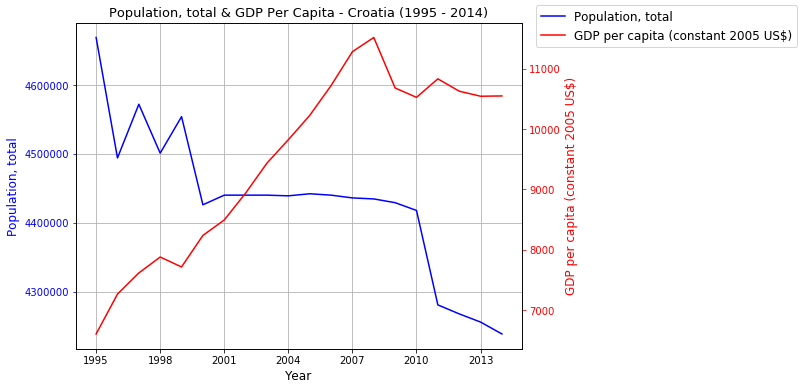

In [31]:
# plot with 2 y-axes
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_title ('Population, total & GDP Per Capita - Croatia (1995 - 2014)',  fontsize=13)

y1_label = pop_cro['IndicatorName'].iloc[0]
y2_label = gdp_cro['IndicatorName'].iloc[0]

ax.plot('Year', 'Value','-b',data=pop_cro, label = y1_label)

ax2 = ax.twinx()
ax2.plot('Year', 'Value', '-r', data=gdp_cro, label=y2_label)
fig.legend(loc=3, bbox_to_anchor=(0.92, 0.78), fontsize=12)

ax.grid(True)
ax.set_xlabel('Year', fontsize=12)

# Make the y-axis label, ticks and tick labels match the line color.
ax.set_ylabel(y1_label, color='b', fontsize=12)
ax.tick_params('y', colors='b')
ax2.set_ylabel(y2_label, color='r', fontsize=12)
ax2.tick_params('y', colors='r')

# makes the x-axis have integer-only tick labels
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

- The Yugoslav wars heavily impacted population of Croatia for almost a decade
- The Great Recession had a smaller but still significant impact that lasted for many years


Let's now check relationship between GDP and population decline.

### Plot and calculate correlation between GDP and total population (1995 - 2014)

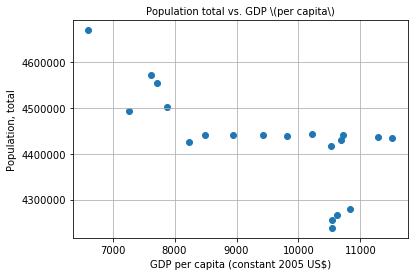

In [32]:
# scatter plot 
fig, axis = plt.subplots()

# Grid lines, Xticks, Xlabel, Ylabel
axis.yaxis.grid(True)
axis.set_title('Population total vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_cro['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(pop_cro['IndicatorName'].iloc[0],fontsize=10)
axis.grid(True)

X = gdp_cro['Value']
Y = pop_cro['Value']

axis.scatter(X, Y)
plt.show()

In [33]:
# join 2 dataframes and calculate correlation
pop_c.join(gdp_c).corr()

,population_total,gdp
population_total,1.000000,-0.715415
gdp,-0.715415,1.000000


There is a negative correlation mostly contributed by steady GDP grow before the Graet Recession in 2008. And during the years after the war, up to 2001, we see population decline. 

We can now check the period after 2008:

### Calculate and plot correlation between GDP and total population (2008 - 2014)

**total population: 2008 - 2014**

In [34]:
pop_cro2 = pop_cro[pop_cro['Year'] > 2007]
pop_cro2

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4539589,Croatia,HRV,"Population, total",SP.POP.TOTL,2008,4434508.0
4718999,Croatia,HRV,"Population, total",SP.POP.TOTL,2009,4429078.0
4900647,Croatia,HRV,"Population, total",SP.POP.TOTL,2010,4417781.0
5083730,Croatia,HRV,"Population, total",SP.POP.TOTL,2011,4280622.0
5259633,Croatia,HRV,"Population, total",SP.POP.TOTL,2012,4267558.0
5428960,Croatia,HRV,"Population, total",SP.POP.TOTL,2013,4255689.0
5568743,Croatia,HRV,"Population, total",SP.POP.TOTL,2014,4238389.0


In [35]:
gdp_cro2 = gdp_cro[gdp_cro['Year'] > 2007]
gdp_cro2

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4539170,Croatia,HRV,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2008,11515.967206
4718592,Croatia,HRV,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2009,10678.729148
4900218,Croatia,HRV,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,10523.900014
5083357,Croatia,HRV,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,10830.556888
5259268,Croatia,HRV,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2012,10626.075772
5428671,Croatia,HRV,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2013,10542.343243
5568516,Croatia,HRV,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,10547.221025


**Transform both dataframes**

In [36]:
# transform dataframe for population
pop_c2 = pop_cro2.set_index(['Year']).drop(['IndicatorCode','IndicatorName','CountryCode','CountryName'],axis=1)
# rename 'Value' column
pop_c2.columns = ['population_total']
pop_c2.head(2)

,population_total
Year,
2008,4434508.0
2009,4429078.0


In [37]:
# transform dataframe for population
gdp_c2 = gdp_cro2.set_index(['Year']).drop(['IndicatorCode','IndicatorName','CountryCode','CountryName'],axis=1)
# rename 'Value' column
gdp_c2.columns = ['gdp']
gdp_c2.head(2)

,gdp
Year,
2008,11515.967206
2009,10678.729148


### Plot "Population, total" and GDP per Capita for Croatia (2008 - 2014)

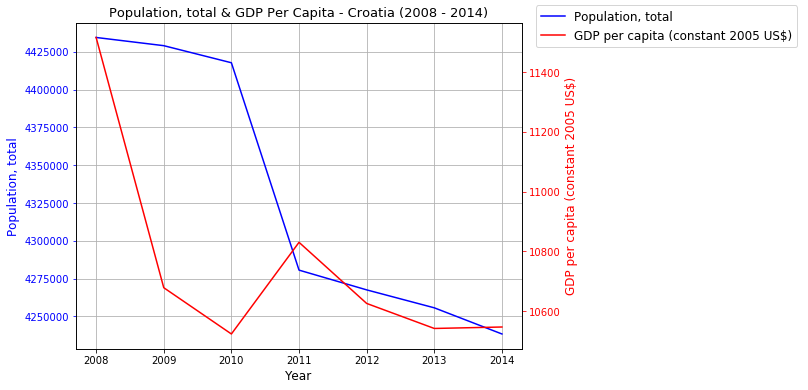

In [38]:
# plot with 2 y-axes
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_title ('Population, total & GDP Per Capita - Croatia (2008 - 2014)',  fontsize=13)

y1_label = pop_cro2['IndicatorName'].iloc[0]
y2_label = gdp_cro2['IndicatorName'].iloc[0]

ax.plot('Year', 'Value','-b',data=pop_cro2, label = y1_label)

ax2 = ax.twinx()
ax2.plot('Year', 'Value', '-r', data=gdp_cro2, label=y2_label)
fig.legend(loc=3, bbox_to_anchor=(0.92, 0.78), fontsize=12)

ax.grid(True)
ax.set_xlabel('Year', fontsize=12)

# Make the y-axis label, ticks and tick labels match the line color.
ax.set_ylabel(y1_label, color='b', fontsize=12)
ax.tick_params('y', colors='b')
ax2.set_ylabel(y2_label, color='r', fontsize=12)
ax2.tick_params('y', colors='r')

# makes the x-axis have integer-only tick labels
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

#### Correlation (2008-2014)

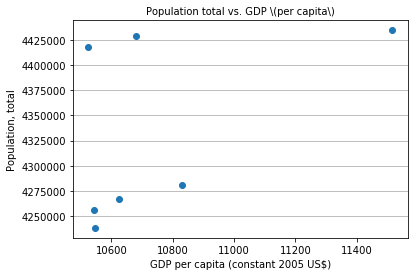

In [39]:
# scatter plot 
fig, axis = plt.subplots()

# Grid lines, Xticks, Xlabel, Ylabel
axis.yaxis.grid(True)
axis.set_title('Population total vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_cro2['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(pop_cro2['IndicatorName'].iloc[0],fontsize=10)

X = gdp_cro2['Value']
Y = pop_cro2['Value']

axis.scatter(X, Y)
plt.show()

In [40]:
# join 2 dataframes and calculate correlation
pop_c2.join(gdp_c2).corr()

,population_total,gdp
population_total,1.000000,0.476007
gdp,0.476007,1.000000


In this period with only a few points, we can see a weak positive correlation.